![](img/Continuum_Logo_0702.png)

# Scientific Programming using Anaconda

## David Mertz

### dmertz@continuum.io

### 2016-04-04

This tutorial, and Python in general, run more smoothly under Python 3.x.

Whether you're running on Python 2 or Python 3, please install [Python-Future](http://python-future.org/futurize.html):
```bash
conda install future
```

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from future import standard_library
standard_library.install_aliases()
from future.builtins import (
         bytes, dict, int, list, object, range, str,
         ascii, chr, hex, input, next, oct, open,
         pow, round, super, filter, map, zip)

# Table of Contents
* [Learning Objectives:](#Learning-Objectives:)
* [Pandas Exercise 1: Handling Messy Data](#Pandas-Exercise-1:-Handling-Messy-Data)
	* [Background](#Background)
	* [Set-up](#Set-up)
	* [Part 1: Read Format](#Part-1:-Read-Format)
	* [Part 2: Time Format](#Part-2:-Time-Format)
	* [Part 3: Visualization](#Part-3:-Visualization)
	* [Part 4: Optional: Simple Statistics to help visualization](#Part-4:-Optional:-Simple-Statistics-to-help-visualization)


# Learning Objectives:

After completion of this module, learners should be able to:

* read a CSV file containing uncommon text formatting
* format TimeStamp indexes upon reading a CSV file
* plot DataFrame data with matplotlib
* use simple statistics to help interpret visualization

# Pandas Exercise 1: Handling Messy Data

## Background

This exercise is a modification from an example by [Julia Evans](http://jvns.ca). The original task is laid out in [Chapter 1](http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb) of the [`pandas` cookbook](https://github.com/jvns/pandas-cookbook). Ms. Evans has shared is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

To begin, we want to use the ``pandas.read_csv`` function to load a ``csv`` file into memory. The file in question, ``data/bikes.csv``, is a record of usage of bicycle paths in Montreal from 2012 (here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) in French).

> *Note: The data file contains the total count of bicycles that were observed on a path in a day, organized by date and by the name of the bicycle path.*

We can use the Unix ``head`` command (or a similar command in Windows) to examine the top six lines of the file `data/bikes.csv`.

        !head -6 data/bikes.csv # prints the first 6 lines of the file to standard output

        Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du
        Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
        01/01/2012;35;;0;38;51;26;10;16;
        02/01/2012;83;;1;68;153;53;6;43;
        03/01/2012;135;;2;104;248;89;3;58;
        04/01/2012;144;;1;116;318;111;8;61;
        05/01/2012;197;;2;124;330;97;13;95;

Notice that the first row appears corrupted because the character encoding used differs from that in the output (this permits French characters and accents). Also notice that the column separator is a semicolon (``;``). 

If we try to load this file using the standard ``pandas.read_csv`` function, we'll likely get an error because both the column separator&mdash;a semicolon (``;``) as opposed to a comma (``,``)&mdash;and the character encoding&mdash;``latin1`` as opposed to ``utf8``&mdash;differ from the defaults for this function (presumably, the ``latin1`` encoding is used to permit use of French characters & accents).

## Set-up

In [2]:
import pandas as pd
%matplotlib inline

## Part 1: Read Format

Use the documentation for the ``pandas.read_csv`` function to successfully load the file
    ``data/bikes.csv`` into a ``pandas.DataFrame``
    called ``bike_data`` using the ``Date`` column as the index.

In [3]:
# Solution: 
# Note: Read the Background section above to learn about possible utf-8/latin1 errors.
file_name = 'data/bikes.csv'
bike_data = pd.read_csv(file_name, 
                        sep=';', 
                        encoding='latin1',
                        index_col='Date')

print( "Index dtype = ", bike_data.index.dtype )
print( bike_data.index )
bike_data.head(5)

Index dtype =  object
Index(['01/01/2012', '02/01/2012', '03/01/2012', '04/01/2012', '05/01/2012',
       '06/01/2012', '07/01/2012', '08/01/2012', '09/01/2012', '10/01/2012',
       ...
       '27/10/2012', '28/10/2012', '29/10/2012', '30/10/2012', '31/10/2012',
       '01/11/2012', '02/11/2012', '03/11/2012', '04/11/2012', '05/11/2012'],
      dtype='object', name='Date', length=310)


,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
01/01/2012,35,NaN,0,38,51,26,10,16,NaN
02/01/2012,83,NaN,1,68,153,53,6,43,NaN
03/01/2012,135,NaN,2,104,248,89,3,58,NaN
04/01/2012,144,NaN,1,116,318,111,8,61,NaN
05/01/2012,197,NaN,2,124,330,97,13,95,NaN


## Part 2: Time Format

Observe that the ``Date`` column of ``bike_data`` contains string representations of dates in the (unwisely ambiguous) format ``DD/MM/YYYY``. 
    
* Use the documentation to help you modify your call to ``pandas.read_csv`` to parse the dates correctly as a ``TimeStamp``.
    
* Once the ``pandas.DataFrame`` ``bike_data`` has been loaded into memory successfully, we should be able to extract columns with appropriate dates as indices, e.g.,

```bash
# Use tab-completion to enter column names easily
bike_data['Maisonneuve 1'].iloc[:5]

Date
2012-01-01     38
2012-01-02     68
2012-01-03    104
2012-01-04    116
2012-01-05    124
Name: Maisonneuve 1, dtype: int64
```

You can use the `.ix[]` selection method to mix label and position selections

```python
bike_data.ix[0:5,'Maisonneuve 1']
```

Notice that the usage is positive during the winter months which is pretty impressive in Montreal!

In [4]:
# Solution
file_name = 'data/bikes.csv'
bike_data = pd.read_csv(file_name, 
                        sep=';', 
                        encoding='latin1',
                        parse_dates=['Date'], 
                        dayfirst=True, 
                        index_col='Date' )

# Notice the Index now has a dtype=datetime64
print( "Index dtype = ", bike_data.index.dtype )
print(bike_data.index)
bike_data.head(5)

Index dtype =  datetime64[ns]
DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)


,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


## Part 3: Visualization

Finally, use the ``pandas.Series`` method `.plot()` to generate a plot of the usage of the `Maisonneuve 1` bike trail during 2012. 

As an aside, the ``pandas.DataFrame`` class has a similar ``.plot()`` method that plots all the time series (corresponding to bike usage on each of the trails) on the same axes.

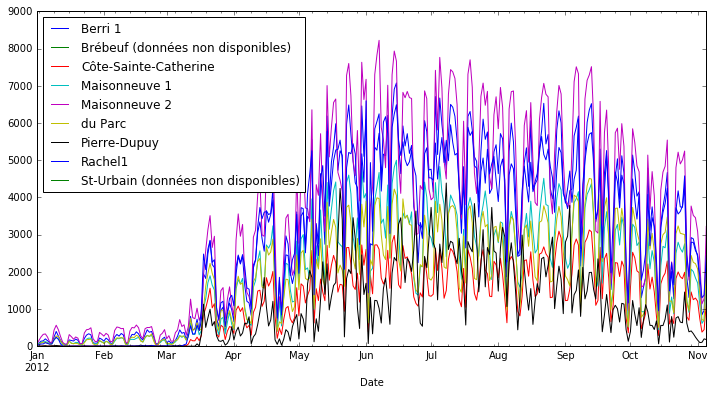

In [5]:
# Solution
# Notice the text labels on the x-axis
bike_data.plot(figsize=(12, 6));

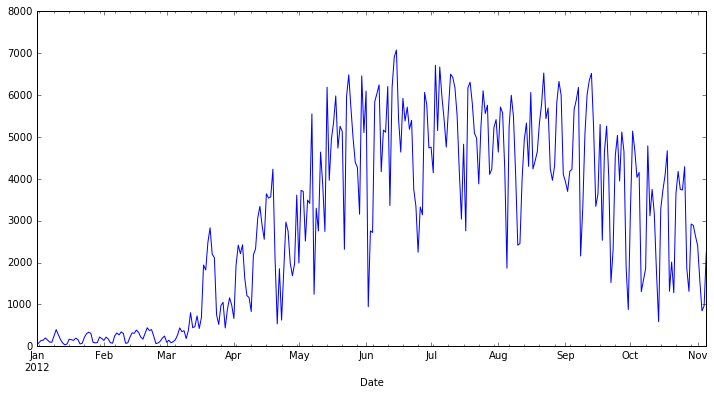

In [6]:
# Solution Alternate 1: plot only one column
bike_data['Berri 1'].plot(figsize=(12, 6));

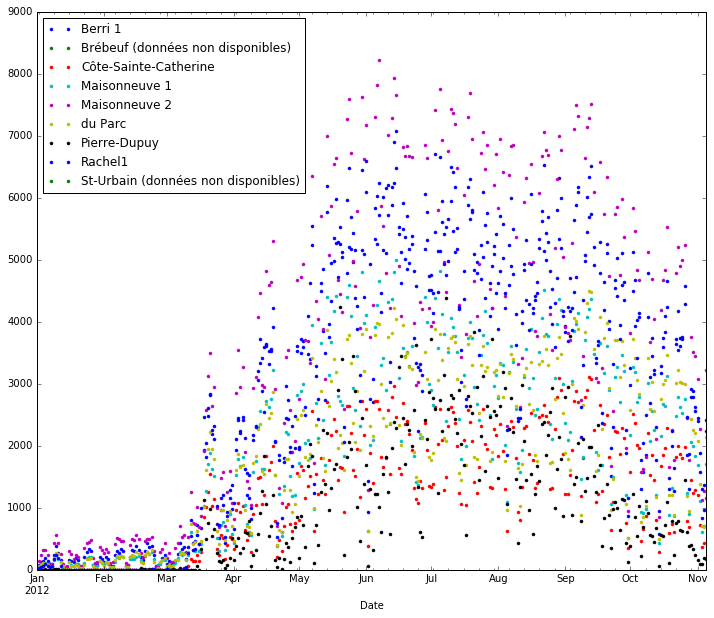

In [7]:
# Solution Alternate 2: 
bike_data.plot(marker='.',linestyle='None', figsize=(12, 10));

## Part 4: Optional: Simple Statistics to help visualization

Plot the usage (bicycle counter-per-day) in a way that is visually easy to parse, Compute the monthly mean of path usage, and plot that, rather than the daily usage

In [8]:
# Reminder: Pandas includes methods for computing mean(), std(), etc...
bike_data.mean()

Berri 1                                2985.048387
Brébeuf (données non disponibles)              NaN
Côte-Sainte-Catherine                  1233.351613
Maisonneuve 1                          1983.325806
Maisonneuve 2                          3510.261290
du Parc                                1862.983871
Pierre-Dupuy                           1054.306452
Rachel1                                2873.483871
St-Urbain (données non disponibles)            NaN
dtype: float64

In [9]:
# Reminder: Pandas also includes a nice summary statistics tool called describe()
bike_data.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [10]:
# Solution: compute the monthly mean bicycle count-per-day
bike_data.groupby(bike_data.index.month).mean()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
1,158.548387,NaN,1.225806,106.709677,249.580645,99.612903,5.161290,36.774194,NaN
2,231.448276,NaN,1.758621,157.689655,352.620690,167.310345,8.275862,2.517241,NaN
3,846.096774,NaN,367.354839,586.903226,1152.774194,693.129032,214.000000,852.806452,NaN
4,2256.633333,NaN,971.233333,1643.733333,2859.533333,1534.933333,539.833333,2391.966667,NaN
5,4299.161290,NaN,1753.548387,3039.483871,4987.387097,2527.580645,1617.096774,4180.322581,NaN
6,4828.300000,NaN,1960.866667,3173.766667,5640.900000,2873.000000,1768.100000,4884.333333,NaN
7,5243.935484,NaN,1924.419355,3289.322581,5892.677419,2839.032258,2581.709677,4861.387097,NaN
8,4813.774194,NaN,1986.741935,3068.064516,5437.290323,2718.096774,1857.516129,4431.516129,NaN
9,4235.366667,NaN,1932.866667,2784.666667,4909.233333,2887.033333,1410.933333,4125.233333,NaN
10,3057.838710,NaN,1463.419355,2050.032258,3721.290323,2309.903226,636.967742,3030.935484,NaN


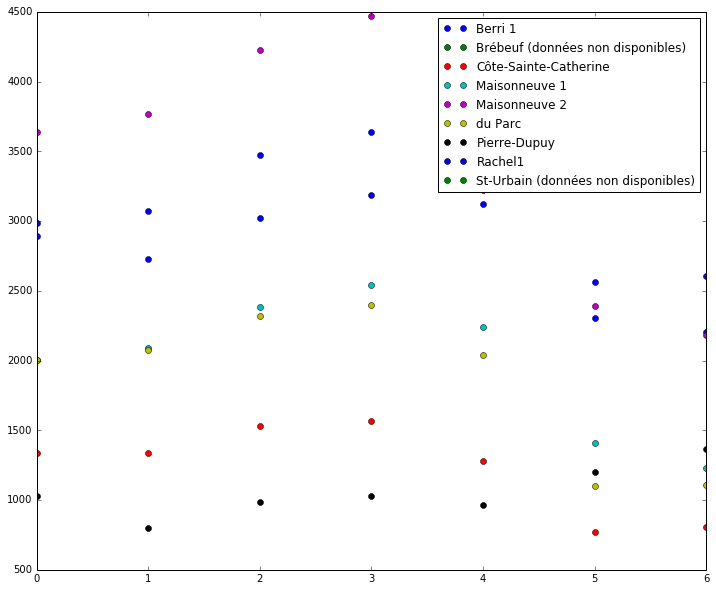

In [11]:
# Solution: computing monthy mean and plotting all in one block
(
bike_data.groupby(bike_data.index.dayofweek)
         .mean()
         .plot(marker='o',linestyle='None', figsize=(12, 10))
)